# Black Friday Dataset :- EDA and Feature Engineering


## Cleaning and Preparing the Data for Model Training

In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Problem statement

A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected hugh volume products from last month.
The data set also contains customer demographics (age, gender, martial status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to product the purchase amount of customer against various products which will help them to create personalized offe for customers against different products.


In [299]:
# import the train dataset

df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [300]:
# import the test dataset

df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [301]:
# Appending(ading from the bottom ) the both train and test dataset

df = df_train.append(df_test)  # here we have to append data from bottom we are not merging from column from left or right side
df.head()

C:\Users\Dhruv Patel\AppData\Local\Temp\ipykernel_19656\853495999.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)  # here we have to append data from bottom we are not merging from column from left or right side


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [302]:
df.shape  # size of dataframe

(783667, 12)

In [303]:
df.info() # for basic information like no of comn, datatype etc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [304]:
df.describe() # to know 5 number summary

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [305]:
# now which column you can blindly delete?
# ===> user_ID because it has no use it just has uniqe id thats why

# so for deleting the column user_ID
df.drop(['User_ID'], axis = 1, inplace = True)

# axis is used to delete horizontally (0) or vertically(1)
# inplace will automatically delete the column user_ID and adjust next feature inplace of user_id

In [306]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Fixing categorical variable to numerical variable

## Encoding of categorical variable

1. Fixing categorical variable because my machine model would not be able to understand about the categorical variable

2. because my model wil not be to understand that how my categorical feature will be there or not

3. In order to making easily understandable to machine model, we will convert the whole categorical features to machine language or numerical variable i.e 0 or 1

In [307]:
# What type of encoding can i use ? 
# ==> here it is two type categorical variable so i can use this method to encode categorical variable into numerical variable
# There are so many methods but this is method 1
# this function will convert categorical variable into numerical variable
# that is 1,0 or machine language
# synatx :- pd.get_dummies(dataframe_name['column_name','...','...',...])

pd.get_dummies(df['Gender']) 
# df['Gender'] = pd.get_dummies(df['Gender'],drop_first = 1)  # work same as map function
# df.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


# But see what is the problem here
if I convert in this way, then I have to create another dataframe , I have to add or merge or append dataframe to the main dataframe , then delete this gender column in main dataframe

So can I do something main dataframe itself where probalbly I can directly convert this wherever there is F into 1 and M into 0 , so how would you do that?

==> By using map function in the main dataframe let see how

In [308]:
# using map function in main dataframe
# synatax : df['column_name'].map({give condition to features})
# this will convert categorical data into machine language i.e 0,1

# Handling (or fixing) categorical feature Gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [309]:
# Handling categorical feature Age

df['Age'].unique() # by using unique() function will give me how many unique values have in Age

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [310]:
# df['Gender'].unique() # bcz we have converted into numerical value

In [311]:
# df['Age'] = pd.get_dummies(df['Age'],drop_first = 1) # this is not a ethical way to do this because this works well in 2 categorical unique group  

# instead of this we will use map()

df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
# df.head()
# this is also called as ranking vise training or target oriented training for model
# in this importance of unique group will be selected rank wise by machine model

# label encoding can also be done

In [312]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [313]:
# # second technique : label encoding
# from sklearn import preprocessing

# # Label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.labelEncoder()

# # Encode labels in column 'Age'
# df['Age'] = label_encoder.fit_transform(df['Age'])  # for the test or train data you need to use fit_transform
# # here we are currently using main data so this is not good practise in this case

# df['Age'].unique()


In [314]:
# handling (or fixing) categorical City_categorical
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [315]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [316]:
# I can use dummies over here
df_city = pd.get_dummies(df['City_Category'],drop_first = True)  # drop_first is true because always understand if I have 3 category,then 2 category is sufficient to represent 3 category 
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [317]:
# now this two (B,C) feature will combine with main dataset

df = pd.concat([df,df_city], axis=1)
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [318]:
# drop the city_category feature from the main dataset

df.drop('City_Category',axis = 1,inplace = True) # inplace is for permanent change to be saved in main data frame

In [319]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


# Missing values


In [320]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [321]:
# purchase has null values is totally understandable because it is a test data
# but we need to fix or replace the null value of product_category1 and product_category2

# focus on replacing the missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [322]:
# what kind of feature will this become?
# ==> is this will become descrete feature(descrete categorical or descrete continues ) or continues feature
# Answer ==> this will become descret categorical feature because this thing only will get repeated

# now if this descrete feature has NaN value then what is the best way to replace the NaN value


df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [323]:
# Replace the missing values with mode

df['Product_Category_2'].mode()[0] 
# there are two mode value, in order to pickup one use indexing


8.0

In [324]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [325]:
df['Product_Category_2'].isnull().sum()

0

In [327]:
# Product_category_3 replace missing values
df["Product_Category_3"].unique()


array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [328]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [330]:
# replace the missing value with null values
df['Product_Category_3'].mode()[0]

16.0

In [331]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [332]:
df['Product_Category_3'].isnull().sum()

0

In [336]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [335]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [337]:
# we also do for Stay_In_Current_City_Years

df["Stay_In_Current_City_Years"].unique()

# here i can replace 4+ with 4 thats ok if the values increase then 4 i write 4 its ok

array(['2', '4+', '3', '1', '0'], dtype=object)

In [339]:
# replacing 4+ with 4

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Dhruv Patel\AppData\Local\Temp\ipykernel_19656\3078480278.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [340]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [341]:
df.info()

# here you can find 'Stay_In_Current_City_Years' is having a object value so we need to convert this datatype into integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [344]:
# converting object into integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [345]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


# Visualisation

In [348]:
# sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

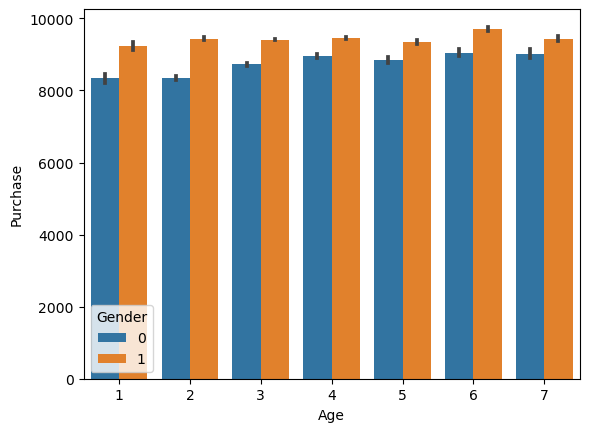

In [354]:
# 1. Barplot for Age VS Purchase

sns.barplot(x='Age',y='Purchase', hue = 'Gender', data=df)

# Observation:
Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

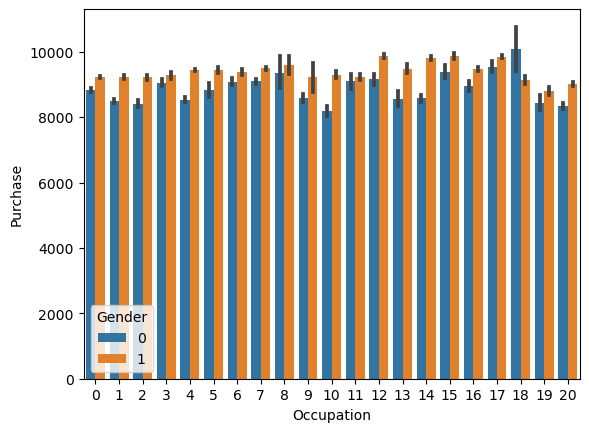

In [355]:
# 2. Barplot for Occupation VS Purchase

sns.barplot(x='Occupation',y='Purchase', hue = 'Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

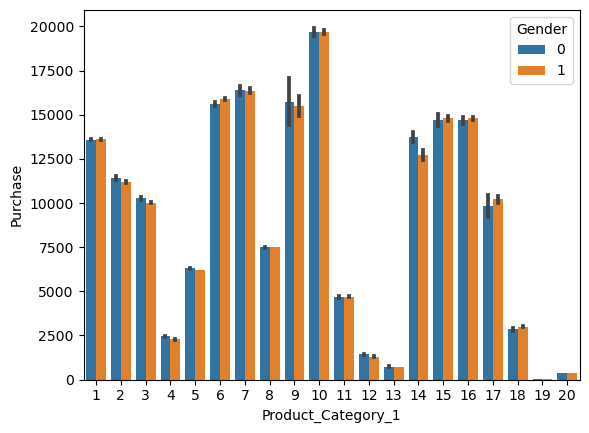

In [356]:
# 3. Barplot for product_category_1 VS Purchase
sns.barplot(x='Product_Category_1',y='Purchase', hue = 'Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

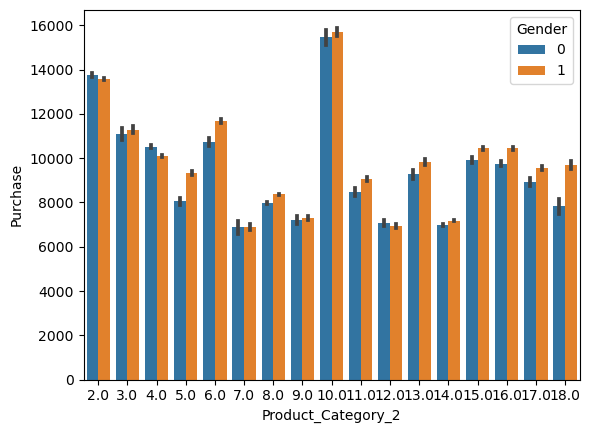

In [357]:
# 4. Barplot for product_category_2 VS Purchase
sns.barplot(x='Product_Category_2',y='Purchase', hue = 'Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

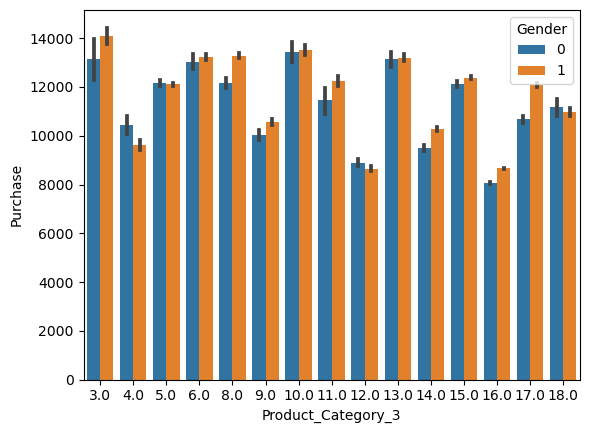

In [358]:
# 5. Barplot for product_category_3 VS Purchase
sns.barplot(x='Product_Category_3',y='Purchase', hue = 'Gender', data=df)

# Observation
Product_Category_1 has sell maximumly then Product_Category_2 and Product_Category-3

In [359]:
df.head() # good data for performing model testing i.e all numerical value

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


# Feature Scaling


In [363]:
# see wherever the purchase data or column is null that all data belongs to your test data

df['Purchase'].isnull().sum()


233599

In [364]:
df_test = df[df['Purchase'].isnull()]     # test dataset for model

In [365]:
df_train = df[~df['Purchase'].isnull()]   # train dataset for model

In [369]:
# just making X and Y axis so that we can get dependent and independent features
X = df_train.drop('Purchase',axis = 1)

In [370]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [371]:
X.shape

(550068, 11)

In [375]:
y = df_train['Purchase']

In [374]:
y.shape

(550068,)

In [376]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# feature Scaling

# from sklearn.preprocessing import Standarscaler

# sc = Standarscaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)